In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

import tensorflow
from keras.layers import LSTM, Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [23]:
# Load data
test = pd.read_csv('Google_Stock_Price_Test.csv')
train = pd.read_csv('Google_Stock_Price_Train.csv')

# Prepare training data
train_set = train.iloc[:,1:2].values
minmaxsc = MinMaxScaler()
train_set_scaled = minmaxsc.fit_transform(train_set)


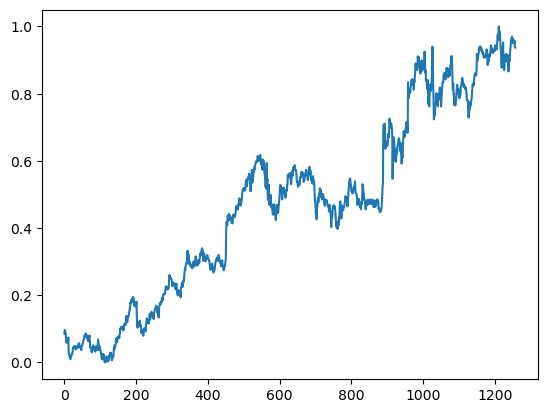

In [24]:
plt.plot(train_set_scaled)
plt.show()

In [12]:
x_train, y_train = [], []
for i in range(120, len(train_set_scaled)):
    x_train.append(train_set_scaled[i-120:i, 0])
    y_train.append(train_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = regressor.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split=0.1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.4979 - val_loss: 0.0022
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2947 - val_loss: 0.0160
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2331 - val_loss: 0.0128
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1804 - val_loss: 0.0246
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1512 - val_loss: 0.0115
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1089 - val_loss: 0.0222
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0922 - val_loss: 0.0071
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0787 - val_loss: 0.0122
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0658 - val_loss: 4.7327e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0687 - val_loss: 6.5324e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0627 - val_loss: 0.0165
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - l

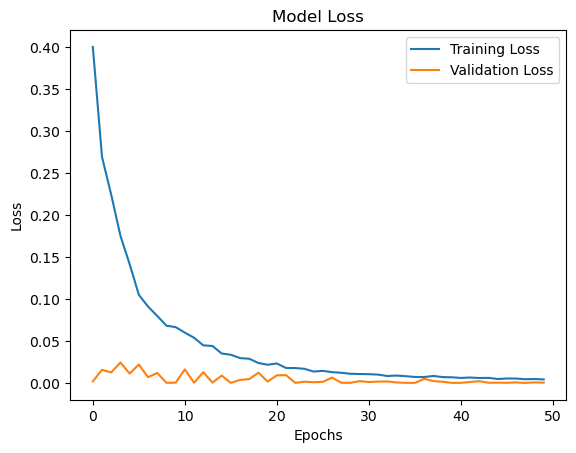

In [31]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [32]:
# Prepare test data
real_stock_price = test.iloc[:,1:2].values
dataset = pd.concat((train['Open'], test['Open']), axis=0)
inputs = dataset[len(dataset) - len(test) - 120:].values
inputs = inputs.reshape(-1, 1)
inputs = minmaxsc.transform(inputs)


In [33]:
x_test = []
for i in range(120, 140):
    x_test.append(inputs[i-120:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [34]:
# Make predictions
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = minmaxsc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


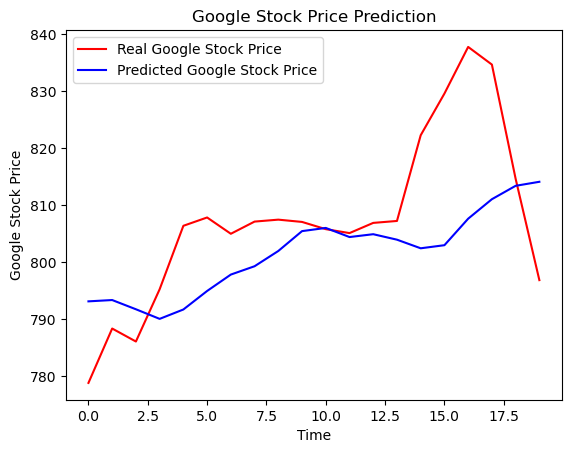

In [35]:
# Visualize results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [13]:
model = Sequential()

model.add(LSTM(units = 100,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1))

/Users/yufeisun/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt)


In [17]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 202ms/step - loss: 0.0152 - val_loss: 0.0031
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - loss: 0.0042 - val_loss: 0.0034
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - loss: 0.0049 - val_loss: 0.0109
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - loss: 0.0042 - val_loss: 0.0099
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - loss: 0.0032 - val_loss: 8.9418e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/

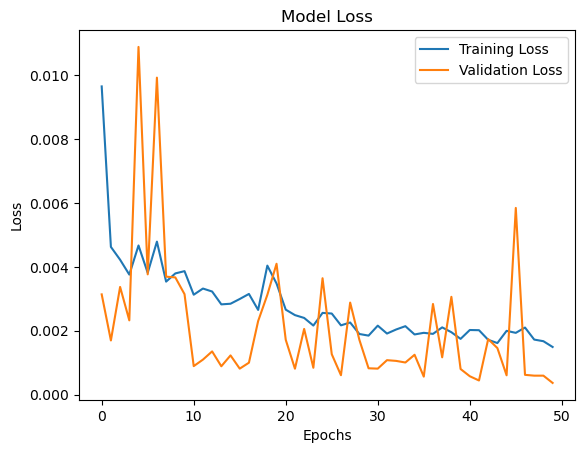

In [18]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [19]:
# Prepare test data
real_stock_price = test.iloc[:,1:2].values
dataset = pd.concat((train['Open'], test['Open']), axis=0)
inputs = dataset[len(dataset) - len(test) - 120:].values
inputs = inputs.reshape(-1, 1)
inputs = minmaxsc.transform(inputs)


In [20]:
x_test = []
for i in range(120, 140):
    x_test.append(inputs[i-120:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [21]:
# Make predictions
predicted_stock_price = model.predict(x_test)
predicted_stock_price = minmaxsc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


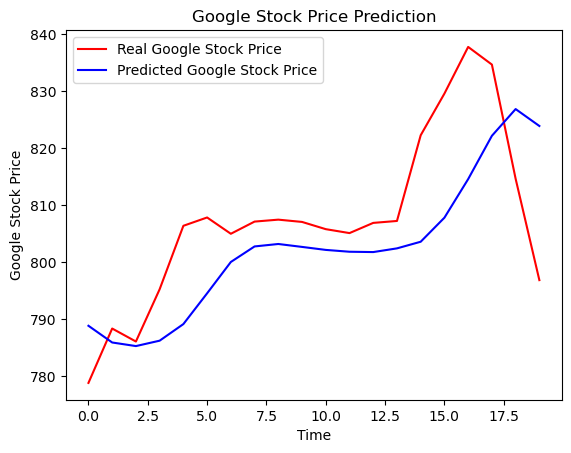

In [22]:
# Visualize results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()